In [1]:
import numpy as np
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
class NetworkArchitecture:
    def __init__(self, size_w):
        self.size_w = size_w
        
    def fully_connected(self):
        return [[1/self.size_w for _ in range(self.size_w)] for _ in range(self.size_w)]
    
    def circular_network(self):
        x = [[0] * self.size_w for _ in range(self.size_w)]
        for i in range(self.size_w):
            for j in range(self.size_w):
                if i == j:
                    x[i][j] = 1/3
                elif i == (j + 1) % self.size_w or j == (i + 1) % self.size_w:
                    x[i][j] = 1/3
        return x

    def fully_disconnected(self):
        x=[[0] * self.size_w for _ in range(self.size_w)]
        for i in range(self.size_w):
            for j in range(self.size_w):
                if i == j:
                    x[i][j] = 1
        return x

In [3]:
class Decentralized_SGLD:
    def __init__(self,size_w,N,sigma,eta,T,dim,b,lam,x,y,w,hv):
        self.size_w=size_w
        self.N=N
        self.sigma=sigma
        self.eta=eta
        self.T=T
        self.dim=dim
        self.b=b
        self.lam=lam
        self.x=x
        self.y=y
        self.w=w
        self.hv=hv
    
    def gradient(self, beta, x, y, dim, lam, b):
        f = np.zeros(dim)
        randomList = np.random.randint(0, len(y)-1, size=int(b))
        for item in randomList:
            h = 1 / (1 + np.exp(-np.dot(beta, x[item])))
            f = f - np.dot((y[item] - h), x[item])
        f = f + np.dot(2/lam, beta)
        return f
    
    def VanilaDESGLD(self):
        """
        Initializaiton
        """
        beta=[]
        for i in range(self.N):
            t=[]
            for j in range(self.size_w):
                temp=np.random.normal(0,self.sigma,self.dim)
                t.append(temp)
            beta.append(t)
        beta=np.array(beta)
        
        history_all=[]       
        beta_mean_all=[]     
        for t in range(1):
            history=[]
            beta_mean=[]
            for i in range(self.size_w):
                temp=[]
                for d in range(self.dim):
                    t=[]
                    temp.append(t)
                history.append(temp)
            for d in range(dim):
                temp=[]
                beta_mean.append(temp)

            for i in range(self.size_w):
                for d in range(self.dim):
                    for n in range(self.N):
                        history[i][d].append(beta[n][i][d])
            for d in range(self.dim):
                for n in range(self.N):
                    temp=0
                    for i in range(self.size_w):
                        temp=temp+1/self.size_w*history[i][d][n]
                    beta_mean[d].append(temp)
            history_all.append(history)
            beta_mean_all.append(beta_mean)
        """
        Update
        """
        step=self.eta
        for m in range(self.T):
            for n in range(self.N):
                for i in range(self.size_w):
                    g=self.gradient(beta[n][i],self.x[i],self.y[i],self.dim,self.lam,self.b)
                    temp=np.zeros(self.dim)
                    for j in range(len(beta[n])):
                        temp=temp+self.w[i][j]*beta[n][j]
                    noise=np.random.normal(0,self.sigma,self.dim)
                    beta[n][i]=temp-step*g+math.sqrt(2*step)*noise

            history=[]
            beta_mean=[]
            for i in range(self.size_w):
                temp=[]
                for d in range(self.dim):
                    t=[]
                    temp.append(t)
                history.append(temp)
            for d in range(self.dim):
                temp=[]
                beta_mean.append(temp)

            for i in range(self.size_w):
                for d in range(self.dim):
                    for n in range(self.N):
                        history[i][d].append(beta[n][i][d])
            for d in range(self.dim):
                for n in range(self.N):
                    temp=0
                    for i in range(self.size_w):
                        temp=temp+1/self.size_w*history[i][d][n]
                    beta_mean[d].append(temp)
            history_all.append(history)
            beta_mean_all.append(beta_mean)
        return history_all
    
    def ExtraDESGLD(self):
        I_n=np.eye(self.size_w)
        
        h_values=self.hv
        
        history_all=[]
        beta_mean_all=[]
        
        for h in h_values:
            w1=[[None for _ in range(self.size_w)] for _ in range(self.size_w)]
            for i in range(self.size_w):
                for j in range(self.size_w):
                    w1[i][j]=h*I_n[i][j]+(1-h)*self.w[i][j]
            """
            Initialization
            """
            beta=[]
            for i in range(self.N):
                t=[]
                for j in range(self.size_w):
                    temp=np.random.normal(0,self.sigma,self.dim)
                    t.append(temp)
                beta.append(t)
            beta=np.array(beta)
            
            history_all_h=[]       
            beta_mean_all_h=[]     
            for t in range(1):
                history=[]
                beta_mean=[]
                for i in range(self.size_w):
                    temp=[]
                    for d in range(self.dim):
                        t=[]
                        temp.append(t)
                    history.append(temp)
                for d in range(self.dim):
                    temp=[]
                    beta_mean.append(temp)

                for i in range(self.size_w):
                    for d in range(self.dim):
                        for n in range(self.N):
                            history[i][d].append(beta[n][i][d])
                for d in range(self.dim):
                    for n in range(self.N):
                        temp=0
                        for i in range(self.size_w):
                            temp=temp+1/self.size_w*history[i][d][n]
                        beta_mean[d].append(temp)
                history_all_h.append(history)
                beta_mean_all_h.append(beta_mean)
            """
            Update
            """
            step=self.eta
            for m in range(self.T):
                for n in range(self.N):
                    for i in range(self.size_w):
                        g=self.gradient(beta[n][i],self.x[i],self.y[i],self.dim,self.lam,self.b)
                        temp=np.zeros(self.dim)
                        for j in range(len(beta[n])):
                            temp=temp+w1[i][j]*beta[n][j]
                        noise=np.random.normal(0,self.sigma,self.dim)
                        beta[n][i]=temp-step*g+math.sqrt(2*step)*noise
                        
                        g=self.gradient(beta[n][i],self.x[i],self.y[i],self.dim,self.lam,self.b)
                        temp=np.zeros(self.dim)
                        for j in range(len(beta[n])):
                            temp=temp+self.w[i][j]*beta[n][j]
                        noise=np.random.normal(0,self.sigma,self.dim)
                        beta[n][i]=temp-step*g+math.sqrt(2*step)*noise
                history=[]
                beta_mean=[]
                for i in range(self.size_w):
                    temp=[]
                    for d in range(self.dim):
                        t=[]
                        temp.append(t)
                    history.append(temp)
                for d in range(self.dim):
                    temp=[]
                    beta_mean.append(temp)

                for i in range(self.size_w):
                    for d in range(self.dim):
                        for n in range(self.N):
                            history[i][d].append(beta[n][i][d])
                for d in range(self.dim):
                    for n in range(self.N):
                        temp=0
                        for i in range(self.size_w):
                            temp=temp+1/self.size_w*history[i][d][n]
                        beta_mean[d].append(temp)
                history_all_h.append(history)
                beta_mean_all_h.append(beta_mean)
            history_all.append(history_all_h)
        return history_all

In [4]:
class Accuracy_Calculator:
    def __init__(self,x_all,y_all,history_all,T):
        self.x_all=x_all
        self.y_all=y_all
        self.history_all=history_all
        self.T=T
    
    def Calculate(self):
        mis_class=[]
        for m in range(self.T+1):
            mis_class.append([])
        for t in range(self.T+1):
            for n in range(len(self.history_all[t][0][0])):
                temp0=0
                for i in range(len(self.x_all)):
                    z=1/(1+np.exp(-np.dot(np.transpose(self.history_all[t][1])[n],self.x_all[i])))
                    if z>=0.5:
                        z=1
                    else:
                        z=0
                    if self.y_all[i]!=z:
                        temp0 +=1
                mis_class[t].append(1-temp0/len(self.x_all))
        result_acc=np.mean(mis_class,axis=1)
        result_std=np.std(mis_class,axis=1)
        
        return result_acc, result_std

# Parameter and Data Setup  
## Parameters

In [5]:
size_w=6; N=100; sigma=1; eta=0.0005; T=20; dim=3; b=32; lam=10; total_data=1000; hv=np.linspace(0.001,0.5,10)

## Data

In [6]:
x = []
np.random.seed(10)
for i in range(total_data):
    x.append([-20 + (20 + 20) * np.random.normal(), -10 + np.random.normal()])
np.random.seed(11)
y = [1 / (1 + np.exp(-item[0] * 1 - 1 * item[1] + 10)) for item in x]
for i in range(len(y)):
    temp = np.random.uniform(0, 1)
    if temp <= y[i]:
        y[i] = 1
    else:
        y[i] = 0

x_all = np.array(x)
y_all = np.array(y)
x_all = x
y_all = y
x_all = np.insert(x_all, 0, 1, axis=1)
x = x_all

'''
    Data splitting
'''

X_train1, x_trainRemain, y_train1, y_trainRemain = train_test_split(
    x, y, test_size=0.83333, random_state=42
)
X_train2, x_trainRemain, y_train2, y_trainRemain = train_test_split(
    x_trainRemain, y_trainRemain, test_size=0.8, random_state=42
)
X_train3, x_trainRemain, y_train3, y_trainRemain =train_test_split(
    x_trainRemain, y_trainRemain, test_size=0.75, random_state=42
)
X_train4, x_trainRemain, y_train4, y_trainRemain = train_test_split(
    x_trainRemain, y_trainRemain, test_size=0.66666666, random_state=42
)
X_train5, X_train6, y_train5, y_train6 = train_test_split(
    x_trainRemain, y_trainRemain,test_size=0.5, random_state=42
)
x = [X_train1, X_train2, X_train3, X_train4, X_train5, X_train6]
y = [y_train1, y_train2, y_train3, y_train4, y_train5, y_train6]

# Apply for all Networks

In [7]:
net=NetworkArchitecture(size_w)
wf=net.fully_connected()
wc=net.circular_network()
wd=net.fully_disconnected()

nets=[wf,wc,wd]

## Vanila DESGLD

Run the VanilaDESGLD algorithm for all three networks

In [8]:
three_net_combined=[]
for w in tqdm(nets):
    method=Decentralized_SGLD(size_w,N,sigma,eta,T,dim,b,lam,x,y,w,hv)
    desgld=method.VanilaDESGLD()
    three_net_combined.append(desgld)

100%|██████████| 3/3 [00:10<00:00,  3.54s/it]


Compute the accuracy

In [9]:
desgld_acc=[]
desgld_std=[]
for desgld in tqdm(three_net_combined):
    desgld_accuracy=Accuracy_Calculator(x_all,y_all,desgld,T)
    d_acc,d_std=desgld_accuracy.Calculate()
    desgld_acc.append(d_acc)
    desgld_std.append(d_std)
desgld_acc=np.array(desgld_acc)
desgld_std=np.array(desgld_std)

100%|██████████| 3/3 [02:44<00:00, 54.95s/it]


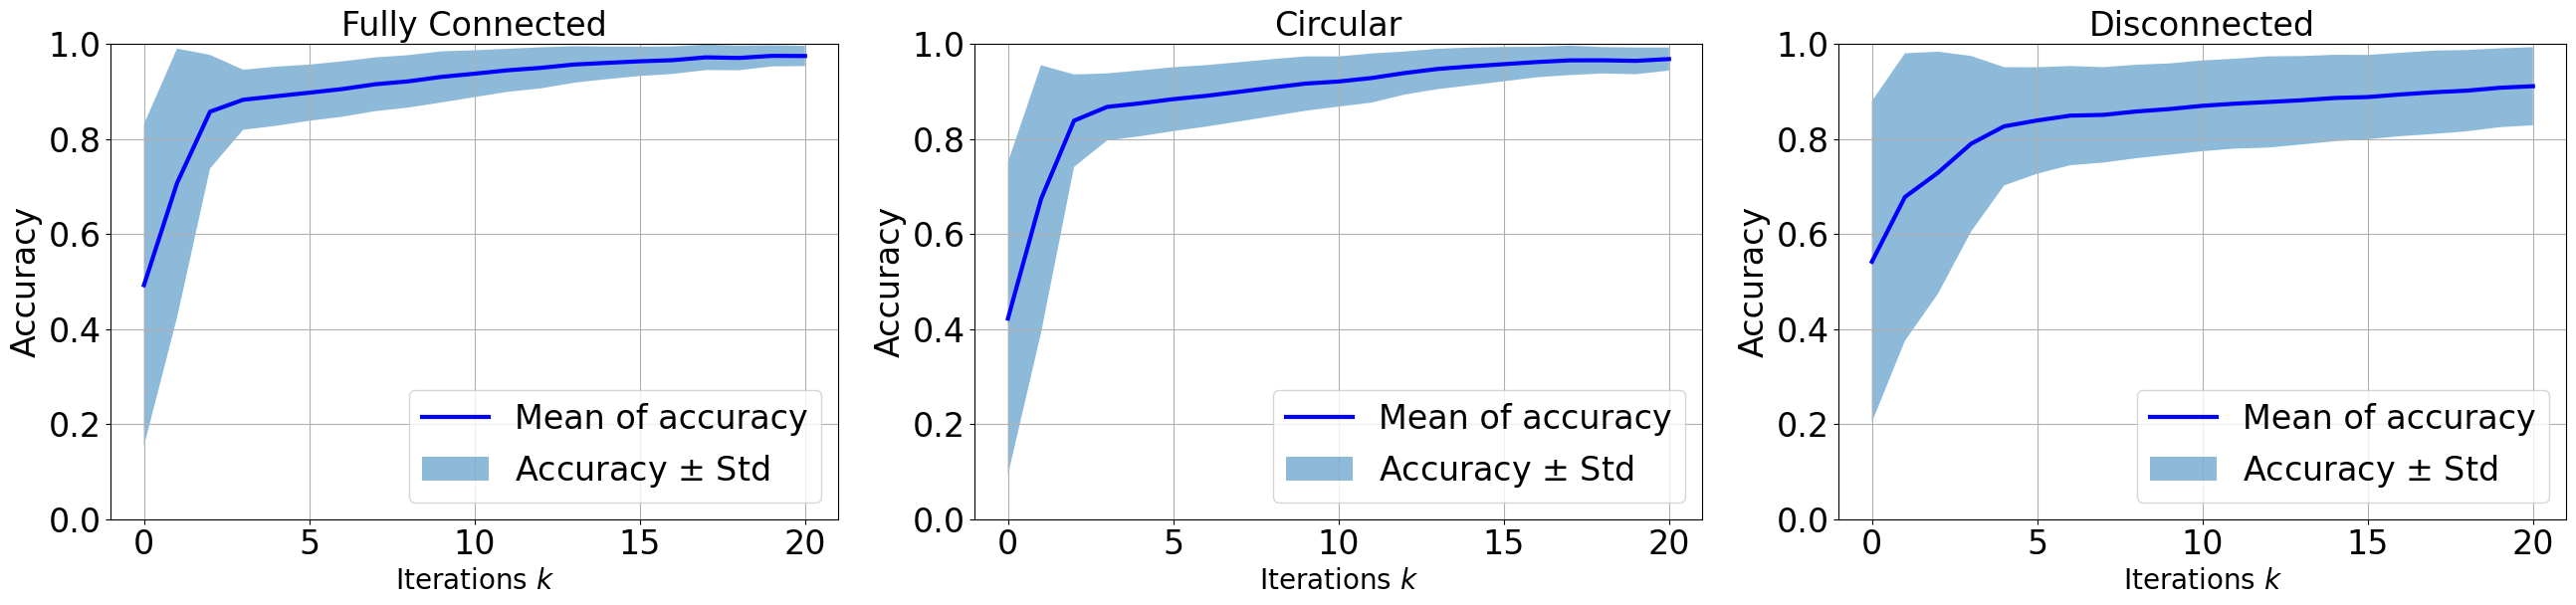

In [10]:
fig, axs=plt.subplots(1, len(desgld_acc),figsize=(26.4,6.6))
mpl.rcParams['font.size'] = 24
index = list(range(T + 1))
titles=["Fully Connected","Circular","Disconnected"]
for i, (d_acc, d_std, title) in enumerate(zip(desgld_acc, desgld_std, titles)):
    axs[i].plot(d_acc, 'b-', linewidth=3)
    axs[i].fill_between(index, d_acc + d_std, d_acc - d_std, alpha=0.5)
    axs[i].set_title(title, fontsize=24)  
    axs[i].legend(['Mean of accuracy', r'Accuracy $\pm$ Std'], loc='lower right', fontsize=24)
    axs[i].set_xlabel(r'Iterations $k$', fontsize=20)  
    axs[i].set_ylabel('Accuracy', fontsize=24)  
    axs[i].set_ylim(0, 1)  
    axs[i].tick_params(labelsize=24) 
    axs[i].grid()
plt.tight_layout()
plt.show()

## EXTRA DE-SGLD

In [11]:
three_net_combined=[]
for w in tqdm(nets):
    method=Decentralized_SGLD(size_w,N,sigma,eta,T,dim,b,lam,x,y,w,hv)
    extradesgld=method.ExtraDESGLD()
    three_net_combined.append(extradesgld)

 67%|██████▋   | 2/3 [02:19<01:09, 69.80s/it]/tmp/ipykernel_2682823/3658259672.py:20: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-np.dot(beta, x[item])))
100%|██████████| 3/3 [03:29<00:00, 69.93s/it]


Accuracy Calculation

In [12]:
extradesgld_acc=[]
extradesgld_std=[]


for i in tqdm(range(len(nets))):
    exacc=[]
    exstd=[]
    for j in range(len(hv)):
        extradesgld_accuracy=Accuracy_Calculator(
            x_all,y_all,three_net_combined[i][j],T
        )
        acc,std=extradesgld_accuracy.Calculate()
        exacc.append(acc)
        exstd.append(std)
    extradesgld_acc.append(exacc)
    extradesgld_std.append(exstd)

extradesgld_acc=np.array(extradesgld_acc)
extradesgld_std=np.array(extradesgld_std)

 67%|██████▋   | 2/3 [18:13<09:07, 547.10s/it]/tmp/ipykernel_2682823/117792796.py:16: RuntimeWarning: overflow encountered in exp
  z=1/(1+np.exp(-np.dot(np.transpose(self.history_all[t][1])[n],self.x_all[i])))
100%|██████████| 3/3 [27:20<00:00, 546.82s/it]


### Plot of the EXTRA DE-SGLD for each of the $h$ values

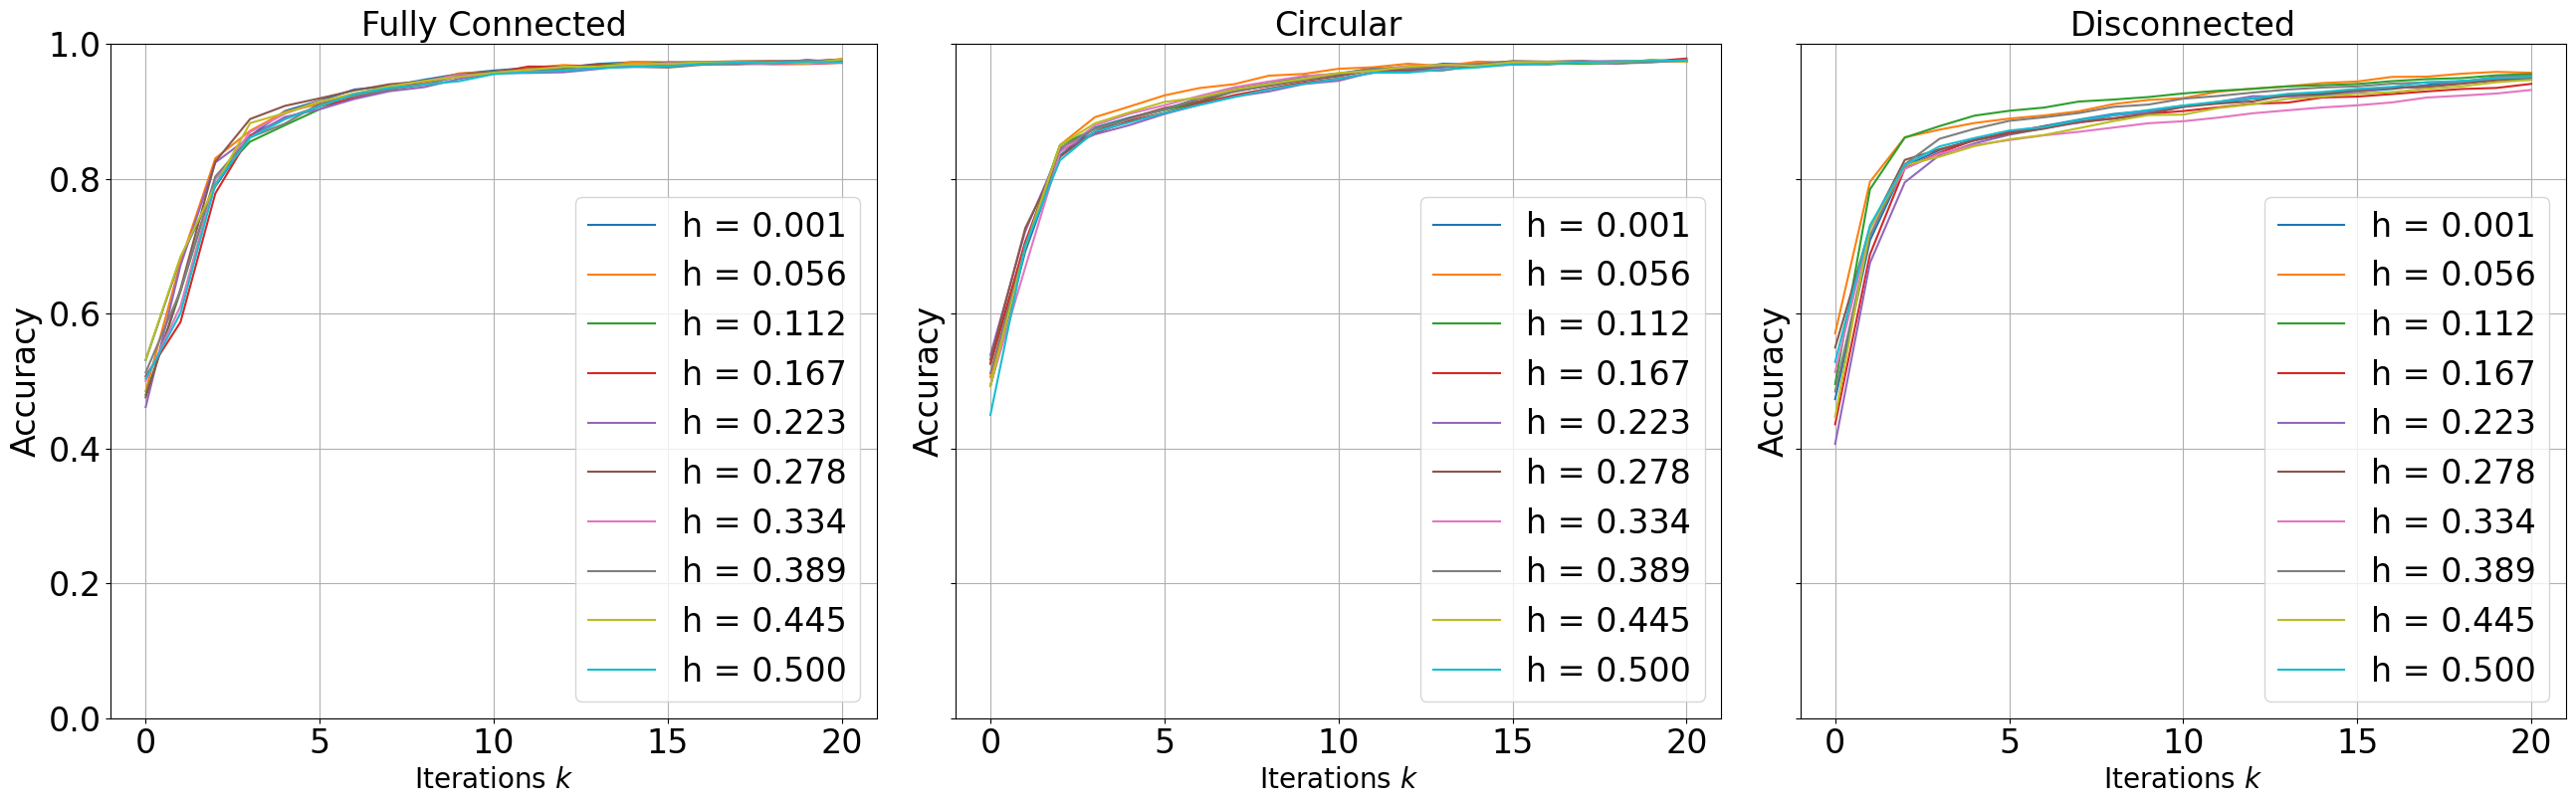

In [13]:
fig, axs=plt.subplots(1, 3,figsize=(26.4,8.6),sharex=True, sharey=True)
mpl.rcParams['font.size'] = 24
index = list(range(T + 1))


titles=['Fully Connected','Circular','Disconnected']

for j, title in enumerate(titles):
    for i, h_value in enumerate(hv):
        axs[j].plot(index,extradesgld_acc[j][i], label=f'h = {h_value:.3f}')
    axs[j].set_title(title, fontsize=24)  
    axs[j].legend(loc='lower right')
    axs[j].set_xlabel(r'Iterations $k$', fontsize=20)  
    axs[j].set_ylabel('Accuracy', fontsize=24)  
    axs[j].set_ylim(0, 1)  
    axs[j].tick_params(labelsize=24) 
    axs[j].grid()
plt.tight_layout()
plt.show()

### Find the Maximum Accuracy for optimal $h$

In [14]:
max_acc_arrays = []
max_acc_indices = []

for i in range(len(nets)):
    max_acc_array = extradesgld_acc[i][np.argmax(np.max(extradesgld_acc[i], axis=1))]
    max_acc_index = np.argmax(np.max(extradesgld_acc[i], axis=1))
    max_acc_arrays.append(max_acc_array)
    max_acc_indices.append(max_acc_index)

max_acc_arrays = np.array(max_acc_arrays)
max_acc_indices = np.array(max_acc_indices)
max_hv_values = hv[max_acc_indices]

max_acc_stds=np.zeros((len(nets), (T+1)))
for i in range(len(nets)):
    max_acc_stds[i] = extradesgld_std[i, max_acc_indices[i]]

### Print optimal $h$ values for each network type

In [15]:
max_hv_values

array([0.05644444, 0.16733333, 0.05644444])

### Plot for the EXTRA DE-SGLD

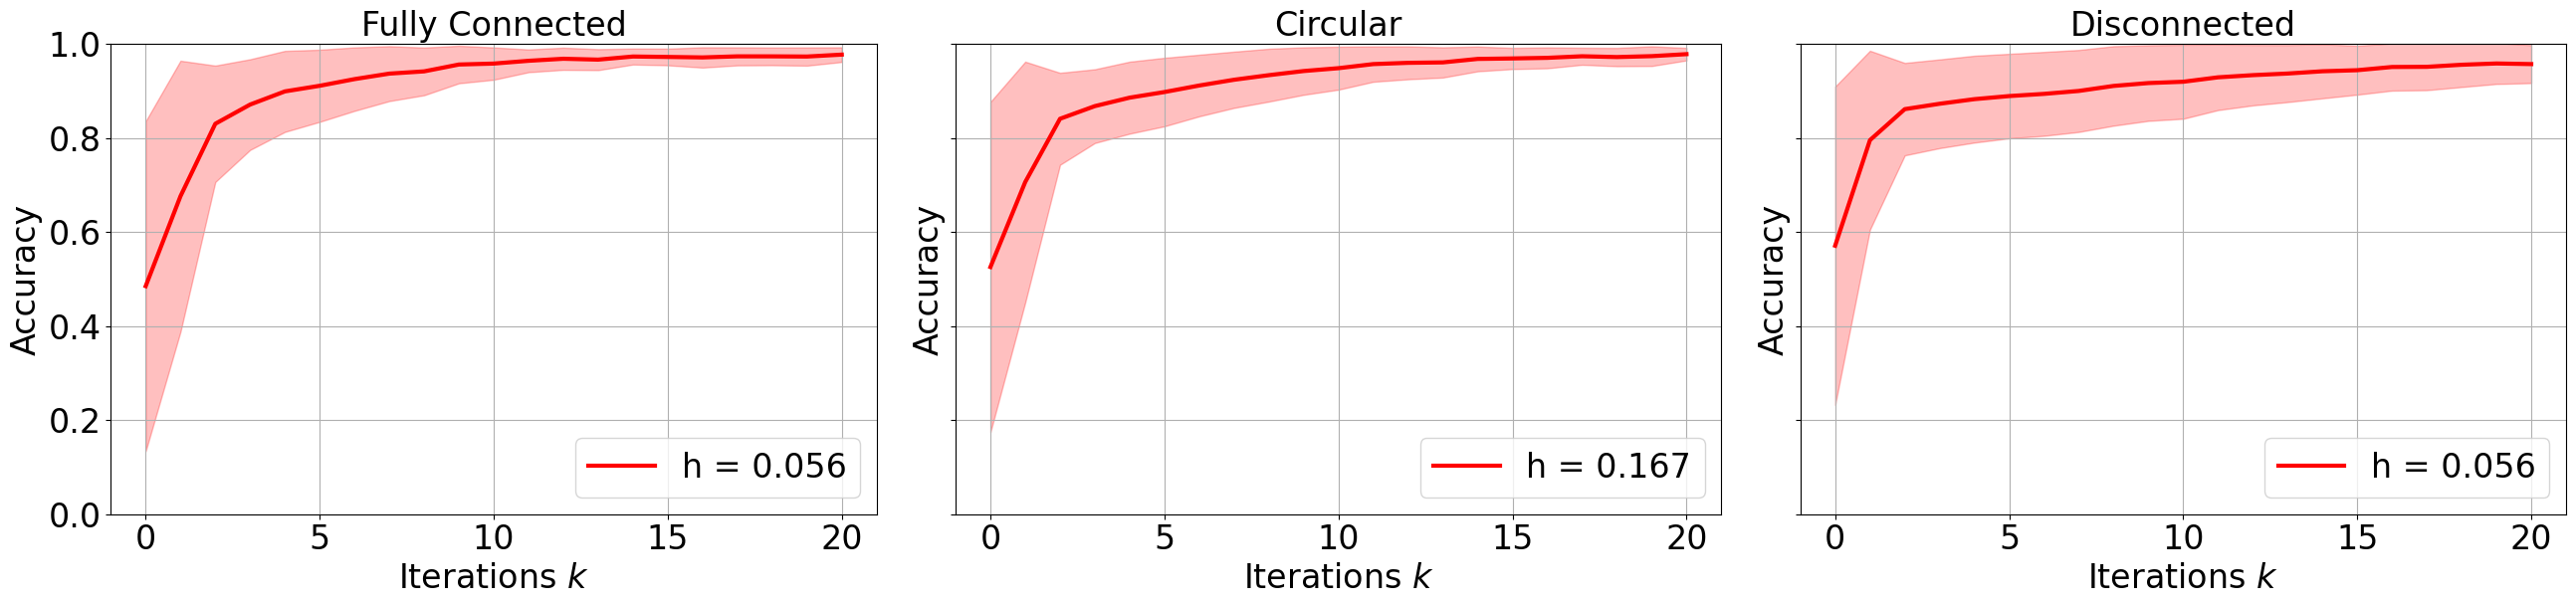

In [16]:
fig, axs=plt.subplots(1, 3,figsize=(26.4,6.6),sharex=True, sharey=True)

mpl.rcParams['font.size'] = 24
index = list(range(T + 1))


titles=['Fully Connected','Circular','Disconnected']

for i,title in enumerate(titles):
    axs[i].plot(max_acc_arrays[i],'r-', linewidth=3,label=f'h = {max_hv_values[i]:.3f}')
    axs[i].fill_between(
        index,max_acc_arrays[i]+max_acc_stds[i],max_acc_arrays[i]-max_acc_stds[i],alpha=0.25,color='red'
    )
    axs[i].set_title(title, fontsize=24)  
    axs[i].legend(loc='lower right')
    axs[i].set_xlabel(r'Iterations $k$', fontsize=24)  
    axs[i].set_ylabel('Accuracy', fontsize=24)  
    axs[i].set_ylim(0, 1)  
    axs[i].tick_params(labelsize=24) 
    axs[i].grid()
plt.tight_layout()
plt.show()

## Comparison of DE-SGLD and EXTRA DE-SGLD

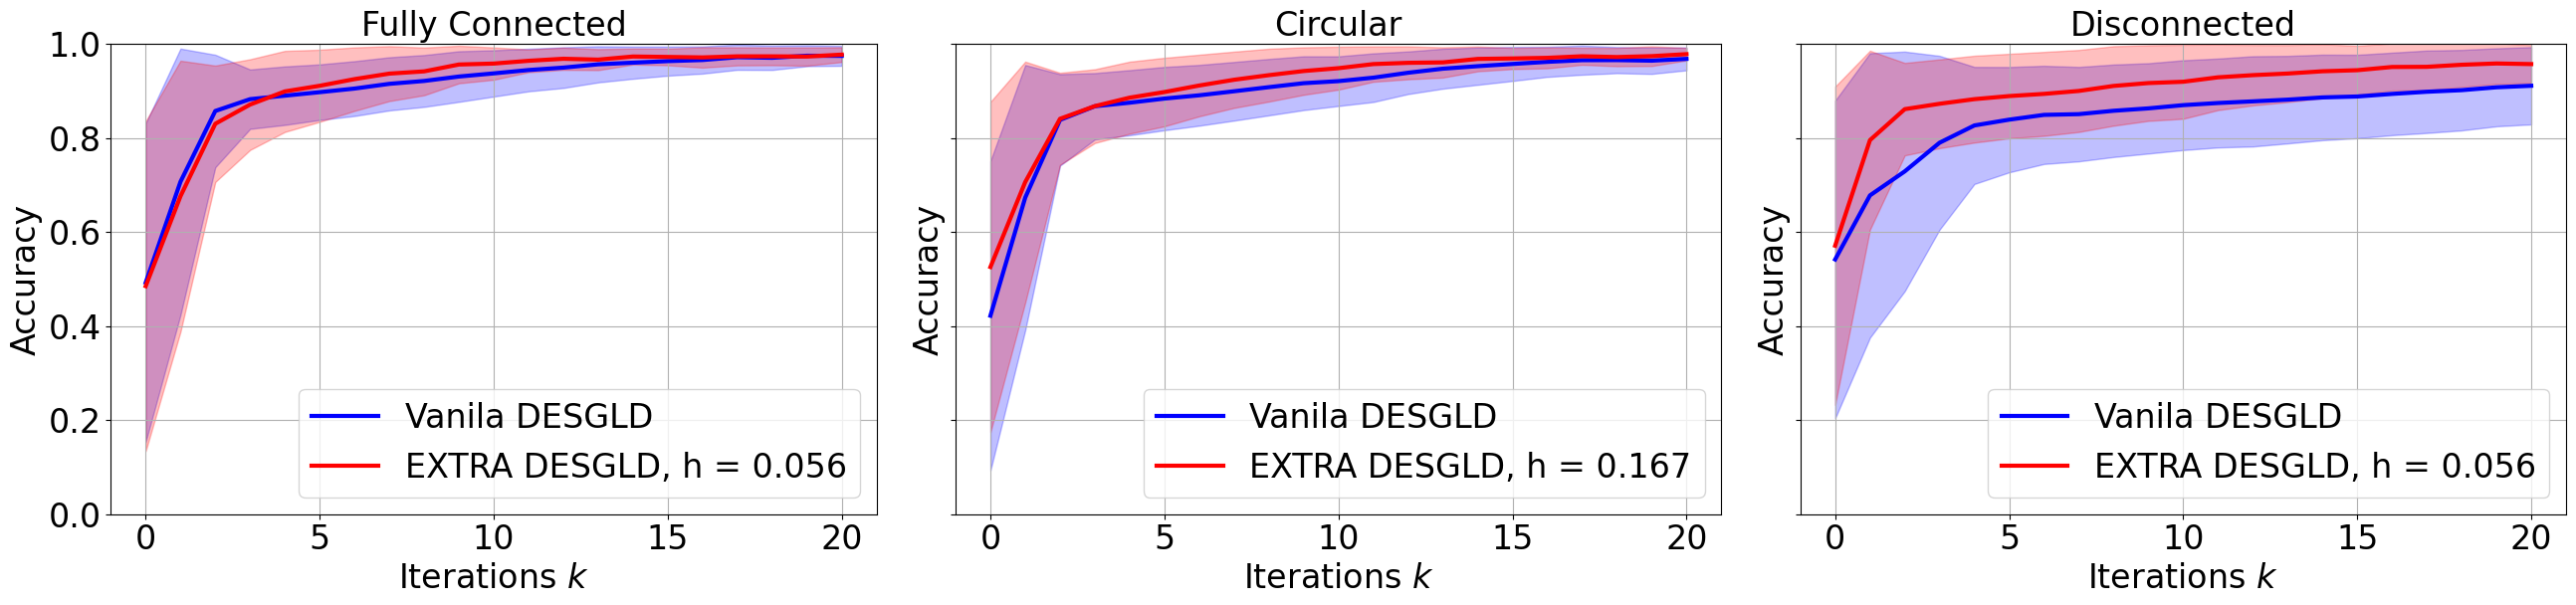

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(26.4, 6.6), sharex=True, sharey=True)

mpl.rcParams['font.size'] = 24
index = list(range(T + 1))

titles = ['Fully Connected', 'Circular', 'Disconnected']

for i, title in enumerate(titles):
    axs[i].plot(desgld_acc[i], 'b-', linewidth=3, label=f'Vanila DESGLD')
    axs[i].fill_between(
        index, desgld_acc[i] + desgld_std[i], desgld_acc[i] - desgld_std[i], alpha=0.25, color='blue'
    )

    axs[i].plot(max_acc_arrays[i], 'r-', linewidth=3, label=f'EXTRA DESGLD, h = {max_hv_values[i]:.3f}')
    axs[i].fill_between(
        index, max_acc_arrays[i] + max_acc_stds[i], max_acc_arrays[i] - max_acc_stds[i], alpha=0.25, color='red'
    )
    axs[i].set_title(title, fontsize=24)
    axs[i].legend(loc='lower right')
    axs[i].set_xlabel(r'Iterations $k$', fontsize=24)
    axs[i].set_ylabel('Accuracy', fontsize=24)
    axs[i].set_ylim(0, 1)
    axs[i].tick_params(labelsize=24)
    axs[i].grid()

plt.tight_layout()
plt.show()